In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score,confusion_matrix



def toNumerical(df):
    label_encoder = LabelEncoder()

    for column in df.columns:
        if df[column].dtype == 'O':
            df[column] = label_encoder.fit_transform(df[column])

    return df


# dataframe ready for processing

df = pd.read_csv("Data.csv")
df = toNumerical(df)

# splitting the data into 80% Training, 20% Testing
X = df.drop("Smoker", axis=1)
Y = df["Smoker"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80)

In [3]:
# Function to draw confusion matrix

def drawConfusionMatrix(modelName,model,y_test):
  y_pred = model.predict(X_test)

  cm = confusion_matrix(y_test, y_pred)

  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
  plt.title(modelName)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

In [4]:
# Function for AUC Score,Plotting ROC Curve,F-Score and Accuracy

def getPerformanceMetrics(model_name,model):
    y_prob = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)

    # ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
    auc_score = roc_auc_score(Y_test, y_prob)

    # F1-score
    f1 = f1_score(Y_test, y_pred)

    # Accuracy
    acc = accuracy_score(Y_test, y_pred)

    # Print metrics
    print(f'Model: {model_name}')
    print(f'AUC Score: {auc_score:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print(f'Accuracy: {acc:.4f}')

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


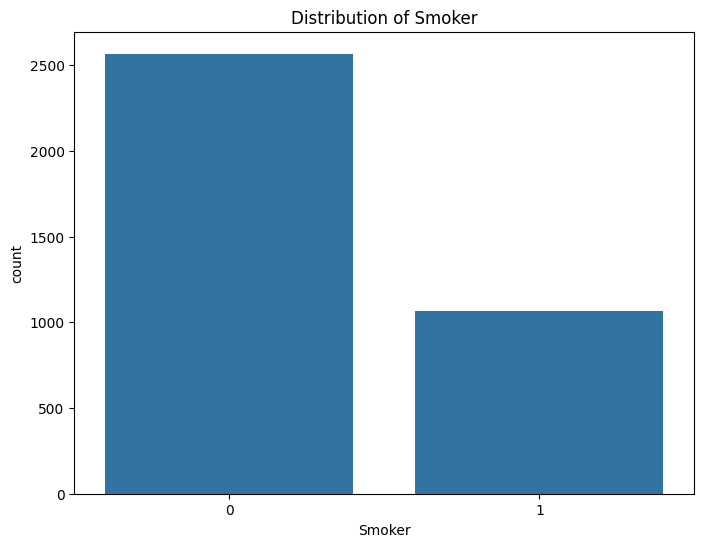

In [5]:
# 1.Distribution of target class

target_column = 'Smoker'

plt.figure(figsize=(8, 6))
sns.countplot(x=target_column, data=df)
plt.title(f'Distribution of {target_column}')
plt.show()

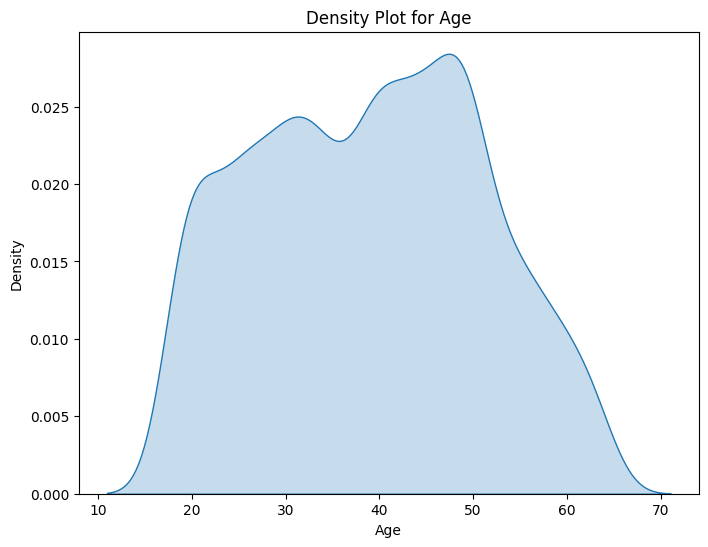

In [6]:
# 2.Density Plot of Age

target_column = 'Age'

plt.figure(figsize=(8, 6))
sns.kdeplot(df[target_column], fill=True)
plt.title(f'Density Plot for {target_column}')
plt.xlabel(target_column)
plt.ylabel('Density')
plt.show()

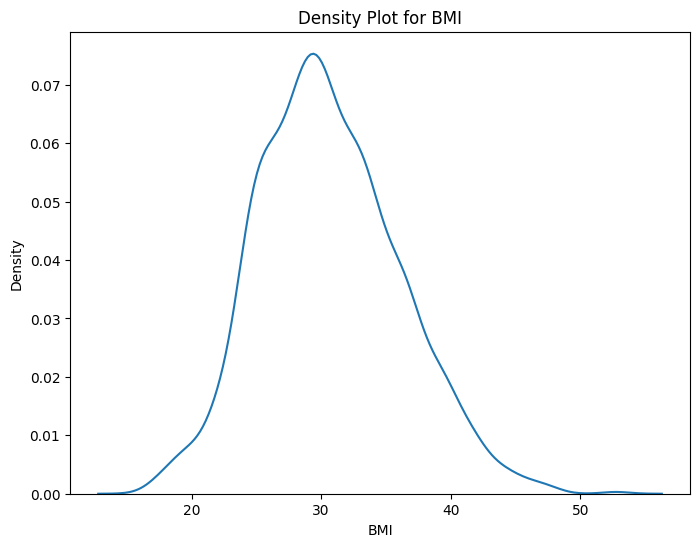

In [7]:
# 3.Density Plot of BMI

target_column = 'BMI'

plt.figure(figsize=(8, 6))
sns.kdeplot(df[target_column])
plt.title(f'Density Plot for {target_column}')
plt.xlabel(target_column)
plt.ylabel('Density')
plt.show()

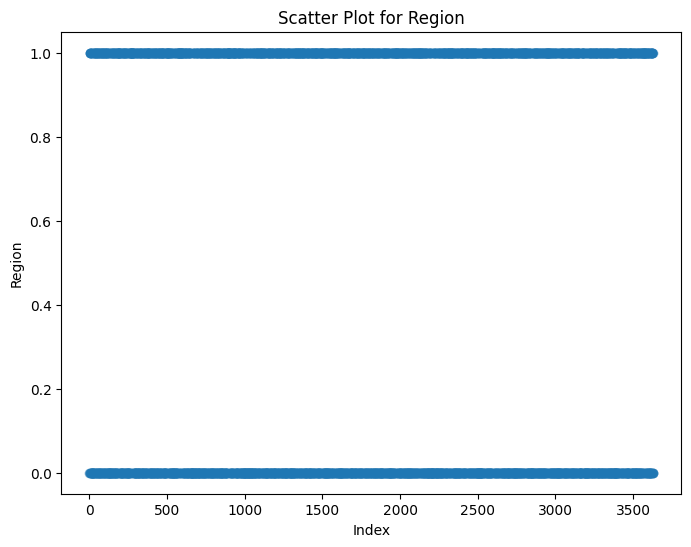

In [8]:
# 4.Region Scatter Plot
####################### Weird Requirement #######################
target_column = 'Region'

plt.figure(figsize=(8, 6))
plt.scatter(df.index , df[target_column], alpha=0.5)
plt.title(f'Scatter Plot for {target_column}')
plt.xlabel('Index')
plt.ylabel(target_column)
plt.show()

Model: KNN1
AUC Score: 0.9725
F1-Score: 0.8471
Accuracy: 0.9105


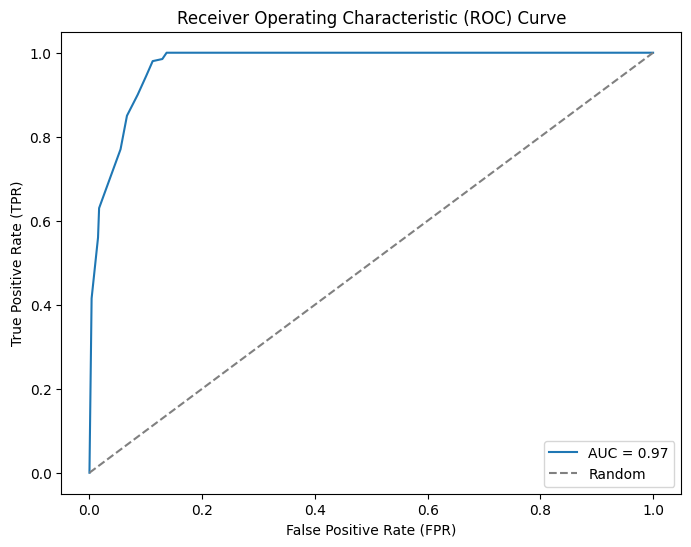

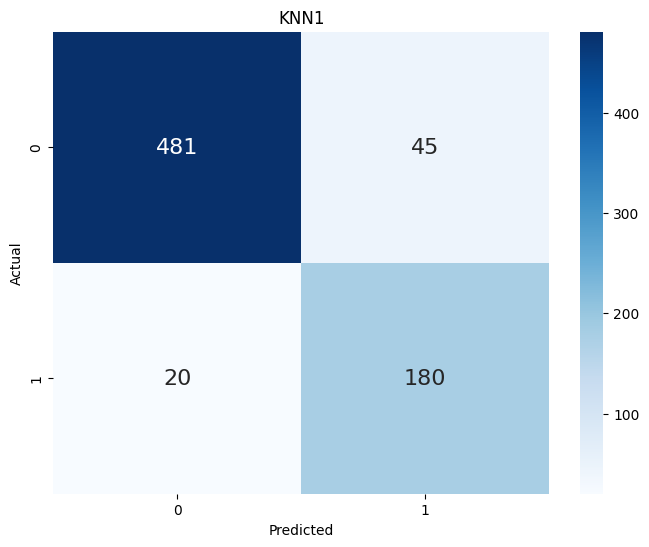

Model: KNN2
AUC Score: 0.9537
F1-Score: 0.8062
Accuracy: 0.8802


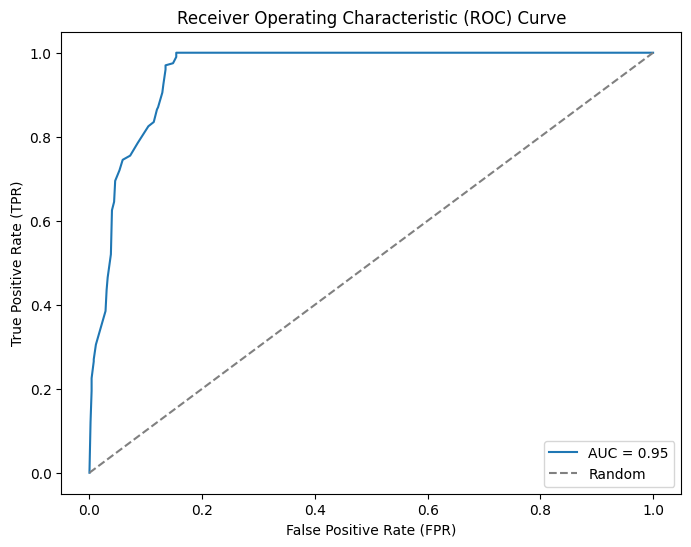

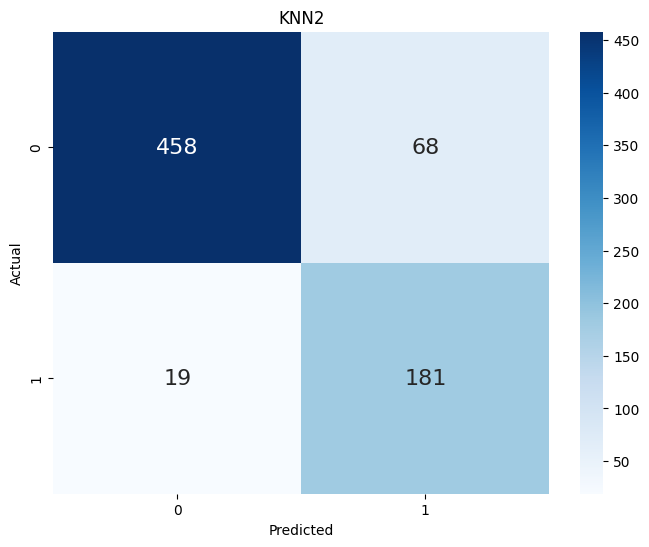

Model: KNN3
AUC Score: 0.9429
F1-Score: 0.8017
Accuracy: 0.8719


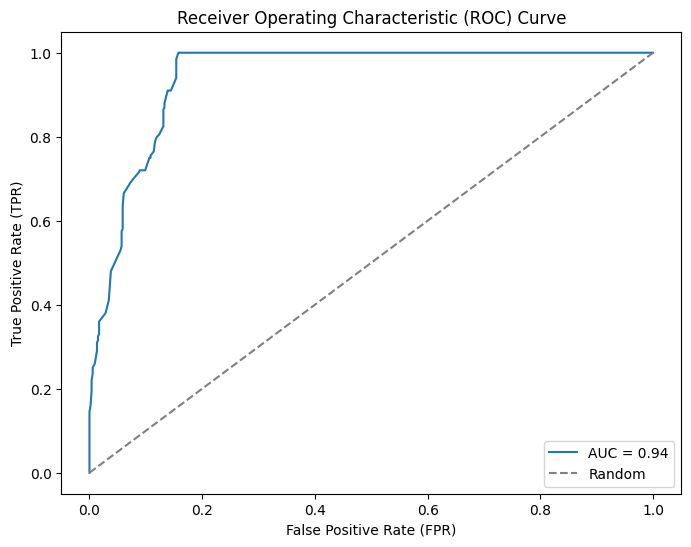

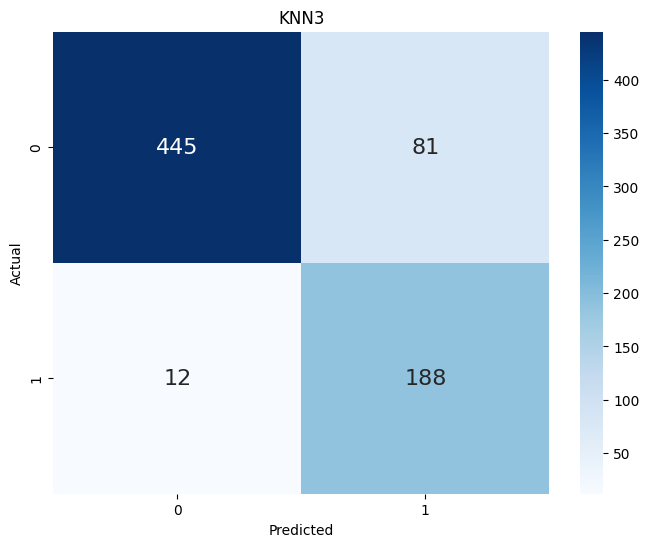

In [9]:
# Three KNN Models
#-----------------------------
knn1_model = KNeighborsClassifier(n_neighbors=11)
knn1_model.fit(X_train, Y_train)

getPerformanceMetrics("KNN1",knn1_model)
drawConfusionMatrix("KNN1",knn1_model,Y_test)
#-----------------------------
knn2_model = KNeighborsClassifier(n_neighbors=49)
knn2_model.fit(X_train, Y_train)

getPerformanceMetrics("KNN2",knn2_model)
drawConfusionMatrix("KNN2",knn2_model,Y_test)
#-----------------------------
knn3_model = KNeighborsClassifier(n_neighbors=151)
knn3_model.fit(X_train, Y_train)

getPerformanceMetrics("KNN3",knn3_model)
drawConfusionMatrix("KNN3",knn3_model,Y_test)


Model: Decision Tree
AUC Score: 0.9177
F1-Score: 0.8756
Accuracy: 0.9311


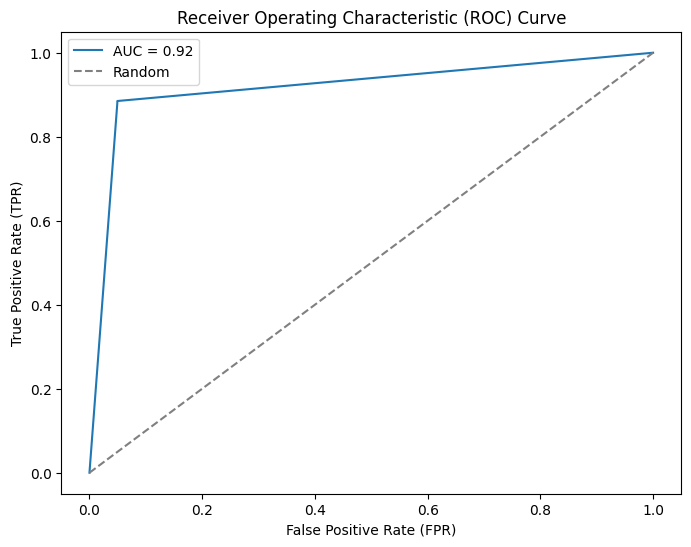

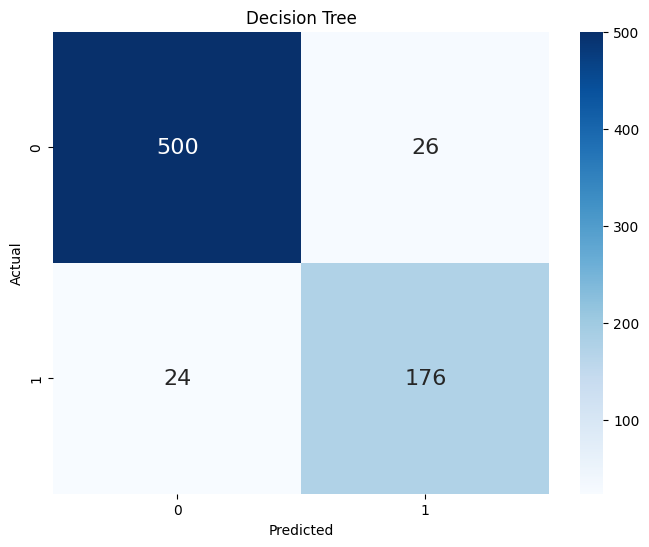

In [10]:
# Decison Tree Classifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

getPerformanceMetrics("Decision Tree",decision_tree)
drawConfusionMatrix("Decision Tree",decision_tree,Y_test)


Model: Naive Bayes
AUC Score: 0.9034
F1-Score: 0.5889
Accuracy: 0.8058


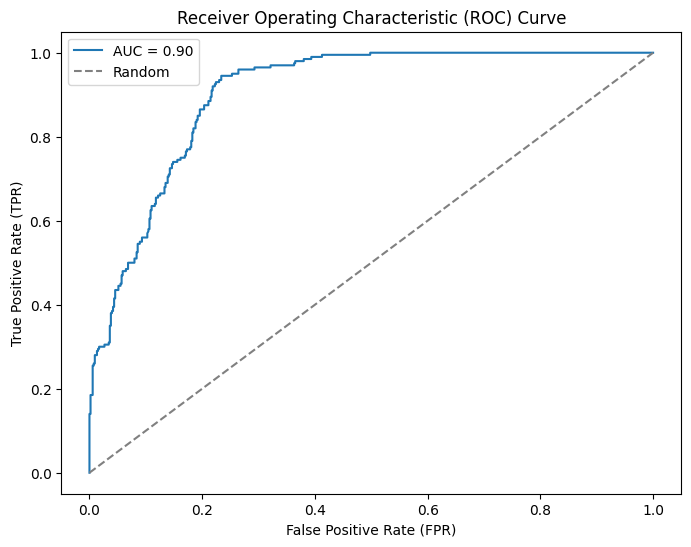

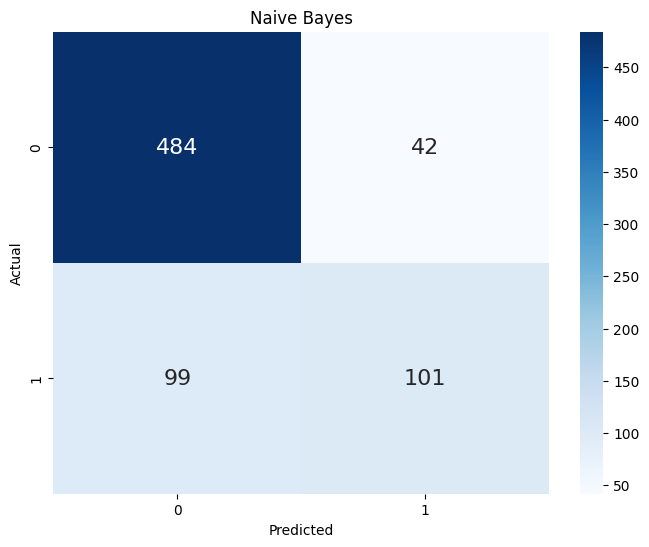

In [11]:
# Naive Bayes Model

nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)

getPerformanceMetrics("Naive Bayes",nb_model)
drawConfusionMatrix("Naive Bayes",nb_model,Y_test)

Model: ANN
AUC Score: 0.9581
F1-Score: 0.8112
Accuracy: 0.8884


c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


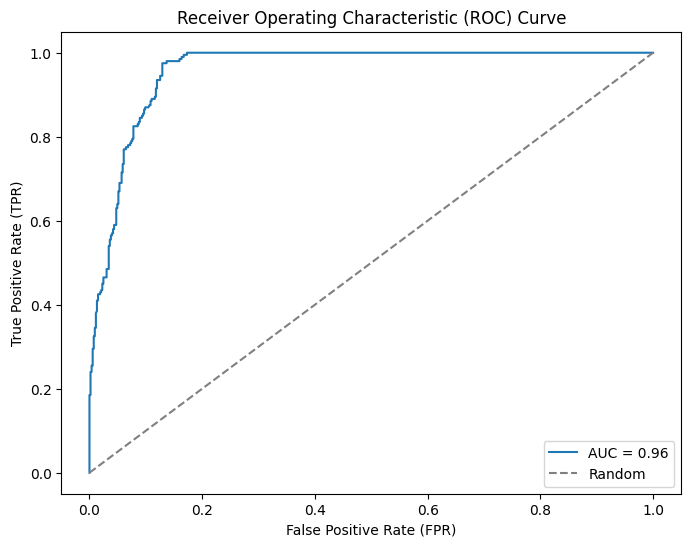

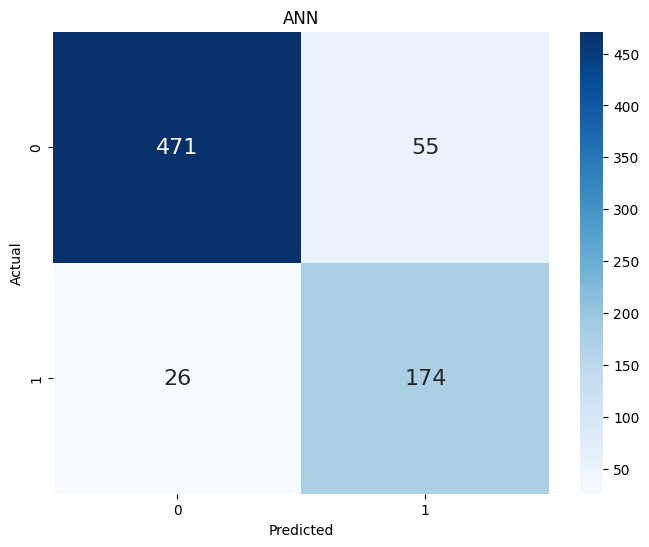

In [17]:
# ANN Model
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

ann_model= MLPClassifier(hidden_layer_sizes=(8),max_iter=500,activation="logistic")
ann_model.fit(X_train, Y_train)

getPerformanceMetrics("ANN",ann_model)
drawConfusionMatrix("ANN",ann_model,Y_test)